# **Submission Pertama - Machine Learning Terapan**

## Library

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline


# Load Dataset

In [5]:
df = pd.read_csv('Student Depression Dataset.csv')

In [6]:
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [7]:
print("Jumlah baris dan kolom:", df.shape)

Jumlah baris dan kolom: (27901, 18)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [9]:
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27898.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,3.139867,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,1.437347,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


In [10]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()} nilai unik")

id: 27901 nilai unik
Gender: 2 nilai unik
Age: 34 nilai unik
City: 52 nilai unik
Profession: 14 nilai unik
Academic Pressure: 6 nilai unik
Work Pressure: 3 nilai unik
CGPA: 332 nilai unik
Study Satisfaction: 6 nilai unik
Job Satisfaction: 5 nilai unik
Sleep Duration: 5 nilai unik
Dietary Habits: 4 nilai unik
Degree: 28 nilai unik
Have you ever had suicidal thoughts ?: 2 nilai unik
Work/Study Hours: 13 nilai unik
Financial Stress: 5 nilai unik
Family History of Mental Illness: 2 nilai unik
Depression: 2 nilai unik


In [11]:
print("Missing values:")
print(df.isnull().sum())

Missing values:
id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64


In [12]:
print("Jumlah data duplikat:", df.duplicated().sum())

Jumlah data duplikat: 0


## EDA

### Distribusi Label Target (Depression)

<ipython-input-13-90935228bd18>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Depression', palette='Set2')


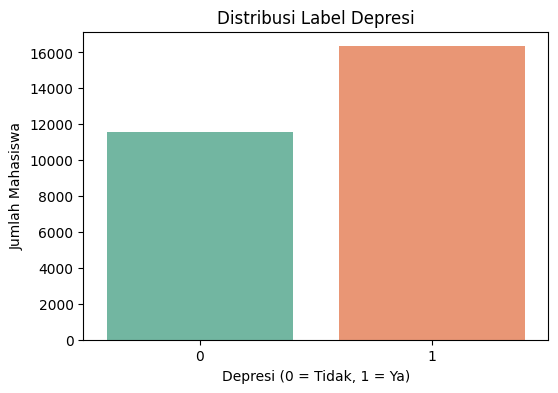

In [13]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Depression', palette='Set2')
plt.title('Distribusi Label Depresi')
plt.xlabel('Depresi (0 = Tidak, 1 = Ya)')
plt.ylabel('Jumlah Mahasiswa')
plt.show()

Diagram diatas menunjukkan bahwa jumlah mahasiswa yang mengalami depresi (label 1) jauh lebih banyak dibandingkan dengan yang tidak mengalami depresi (label 0), mengindikasikan adanya prevalensi depresi yang signifikan di kalangan mahasiswa.

### Perbandingan Depresi Berdasarkan Gender

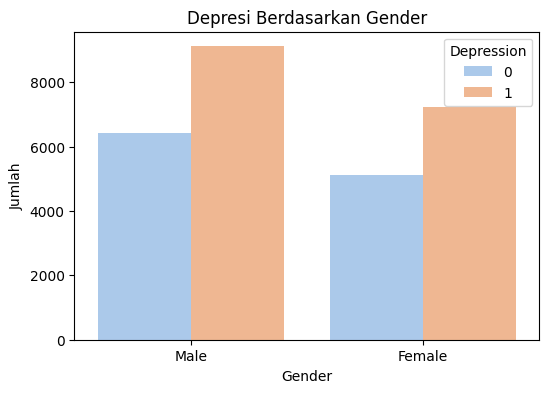

In [14]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Gender', hue='Depression', palette='pastel')
plt.title('Depresi Berdasarkan Gender')
plt.xlabel('Gender')
plt.ylabel('Jumlah')
plt.show()

Dari diagram, terlihat bahwa jumlah Laki laki yang mengalami depresi (label 1) lebih tinggi dibandingkan dengan Perempuan. Hal ini mengindikasikan bahwa Laki laki mungkin lebih rentan terhadap depresi di antara populasi yang diteliti.

### Hubungan Akademik dan Depresi

**Academic Pressure vs Depression**

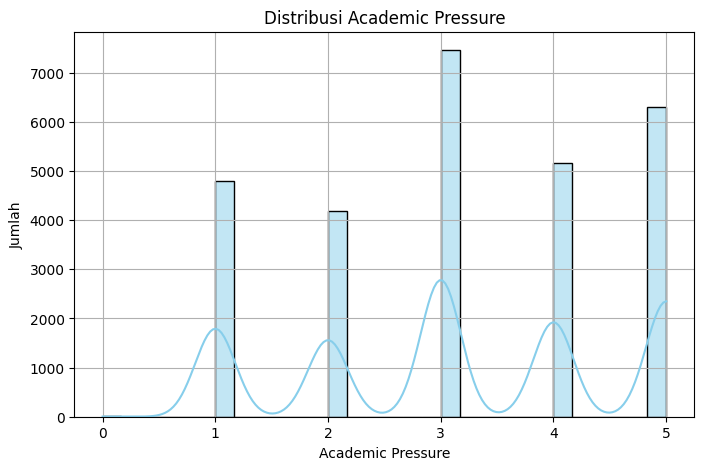

In [15]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Academic Pressure'], bins=30, kde=True, color='skyblue')
plt.title("Distribusi Academic Pressure")
plt.xlabel("Academic Pressure")
plt.ylabel("Jumlah")
plt.grid(True)
plt.show()

<ipython-input-16-c90cebc217db>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Depression', y='Academic Pressure', palette='coolwarm')


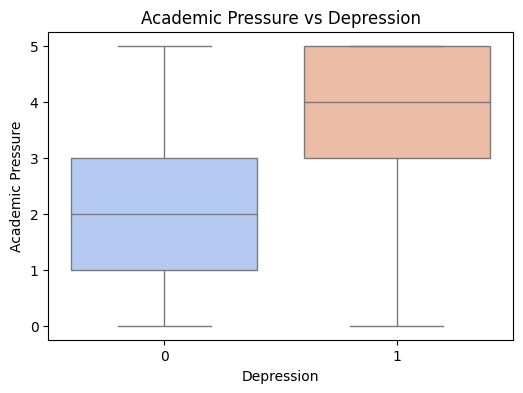

In [16]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Depression', y='Academic Pressure', palette='coolwarm')
plt.title('Academic Pressure vs Depression')
plt.show()

Dari diagram, terlihat bahwa individu yang mengalami depresi cenderung memiliki tingkat tekanan akademik yang lebih tinggi dibandingkan dengan mereka yang tidak mengalami depresi. Hal ini menunjukkan bahwa tekanan akademik mungkin berkontribusi terhadap peningkatan risiko depresi di kalangan mahasiswa.

**Study Satisfaction vs Depression**

<ipython-input-17-58c9676a452d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Depression', y='Study Satisfaction', palette='coolwarm')


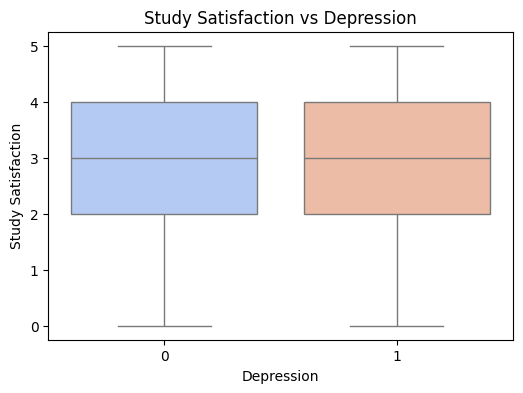

In [17]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Depression', y='Study Satisfaction', palette='coolwarm')
plt.title('Study Satisfaction vs Depression')
plt.show()

Dari diagram, terlihat bahwa tingkat kepuasan belajar relatif seimbang antara individu yang tidak mengalami depresi dan mereka yang mengalami depresi. Hal ini menunjukkan bahwa meskipun ada perbedaan, kepuasan belajar tidak bervariasi secara drastis antara kedua kelompok.

### Pola Tidur dan Depresi

<ipython-input-18-634ed72759e9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Sleep Duration', data=df, order=df['Sleep Duration'].value_counts().index, palette='viridis')


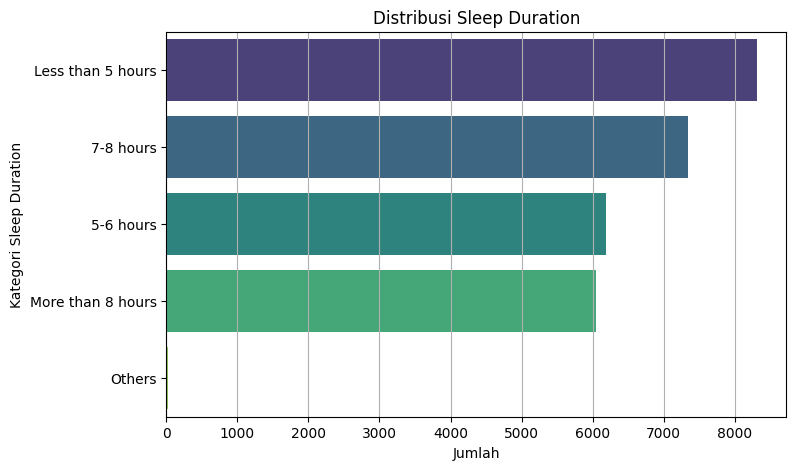

In [18]:
plt.figure(figsize=(8, 5))
sns.countplot(y='Sleep Duration', data=df, order=df['Sleep Duration'].value_counts().index, palette='viridis')
plt.title("Distribusi Sleep Duration")
plt.xlabel("Jumlah")
plt.ylabel("Kategori Sleep Duration")
plt.grid(True, axis='x')
plt.show()

dari diagram diatas dapat dilihat bahwa paling banyak individu tidur kurang dari 5 jam per hari nya.

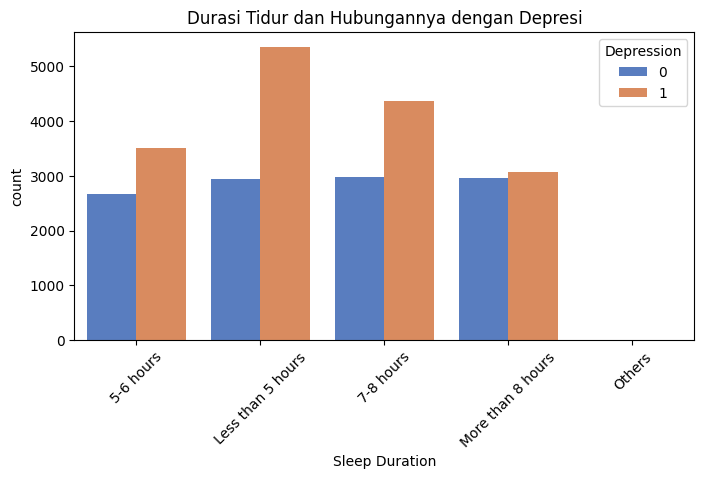

In [19]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Sleep Duration', hue='Depression', palette='muted')
plt.title('Durasi Tidur dan Hubungannya dengan Depresi')
plt.xticks(rotation=45)
plt.show()

Dari diagram, terlihat bahwa individu yang tidur kurang dari 5 jam dan antara 5-6 jam memiliki jumlah depresi yang lebih tinggi (label 1) dibandingkan dengan mereka yang tidur lebih dari 8 jam. Hal ini menunjukkan bahwa kurang tidur mungkin berhubungan dengan peningkatan risiko depresi di kalangan mahasiswa.

### Tekanan Finansial dan Depresi

<ipython-input-20-022b35ad9a49>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Depression', y='Financial Stress', palette='Blues')


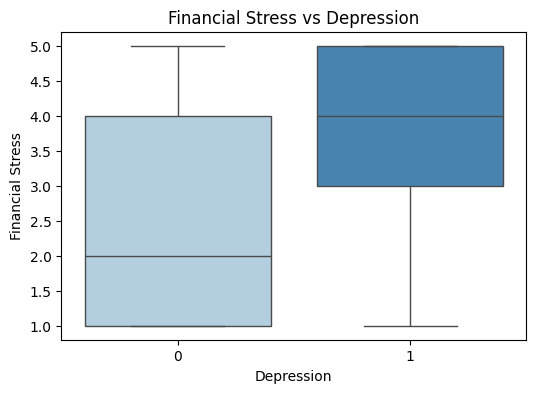

In [20]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Depression', y='Financial Stress', palette='Blues')
plt.title('Financial Stress vs Depression')
plt.show()

Dari diagram, terlihat bahwa individu yang mengalami depresi memiliki tingkat stres finansial yang lebih tinggi dibandingkan dengan mereka yang tidak mengalami depresi. Hal ini menunjukkan bahwa stres finansial dapat berkontribusi terhadap peningkatan risiko depresi di kalangan mahasiswa.

### Riwayat penyakit mental dalam keluarga dan Depresi

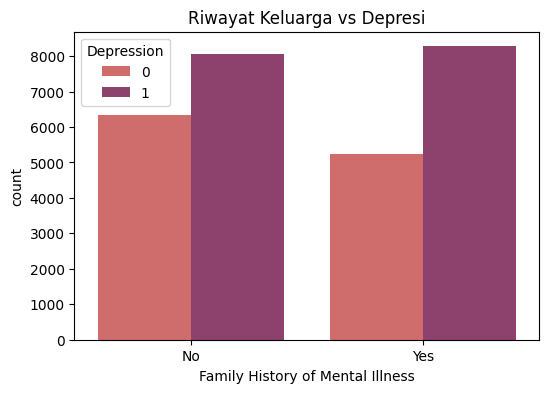

In [21]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Family History of Mental Illness', hue='Depression', palette='flare')
plt.title('Riwayat Keluarga vs Depresi')
plt.show()

Dari diagram, terlihat bahwa jumlah individu yang mengalami depresi (label 1) lebih tinggi pada kelompok yang memiliki riwayat keluarga penyakit mental dibandingkan dengan yang tidak. Hal ini menunjukkan bahwa riwayat keluarga dapat berhubungan dengan peningkatan risiko depresi di kalangan mahasiswa.

### Dietary Habits dan Depresi

<ipython-input-22-b62dff2bb8f1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Dietary Habits', data=df, order=df['Dietary Habits'].value_counts().index, palette='Set2')


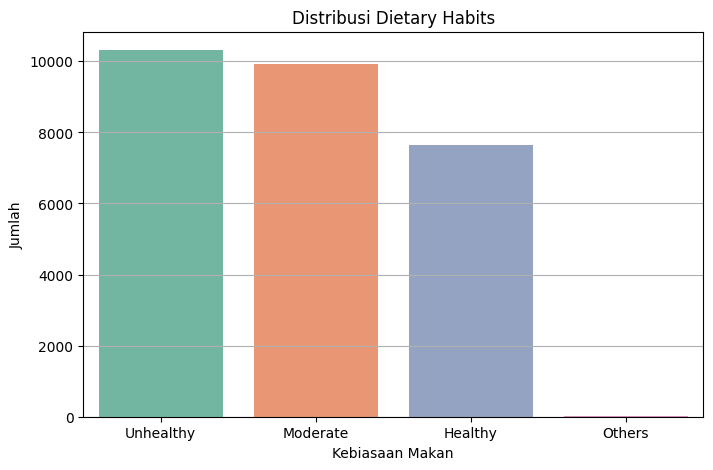

In [22]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Dietary Habits', data=df, order=df['Dietary Habits'].value_counts().index, palette='Set2')
plt.title("Distribusi Dietary Habits")
plt.xlabel("Kebiasaan Makan")
plt.ylabel("Jumlah")
plt.grid(True, axis='y')
plt.show()

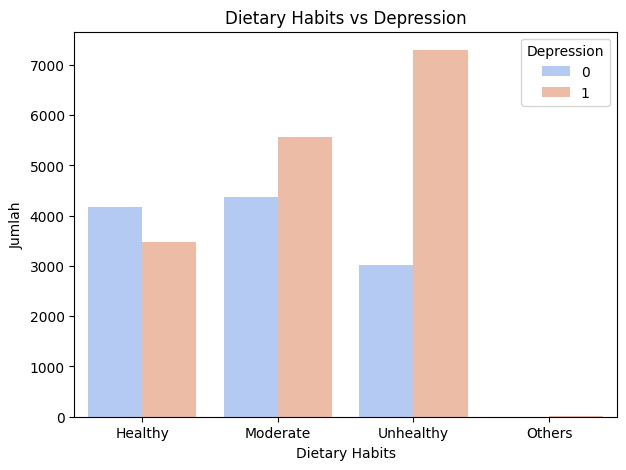

In [23]:
plt.figure(figsize=(7, 5))
sns.countplot(x='Dietary Habits', hue='Depression', data=df, palette='coolwarm')
plt.title("Dietary Habits vs Depression")
plt.xlabel("Dietary Habits")
plt.ylabel("Jumlah")
plt.show()

Kebiasaan diet memiliki pengaruh signifikan terhadap tingkat depresi. Individu dengan kebiasaan diet tidak sehat cenderung mengalami depresi lebih tinggi dibandingkan dengan mereka yang memiliki kebiasaan diet sehat. Ini menunjukkan pentingnya pola makan yang baik dalam menjaga kesehatan mental.

### Degree dan Depresi

<ipython-input-24-b9f4960cc895>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Degree', data=df, order=df['Degree'].value_counts().index, palette='pastel')


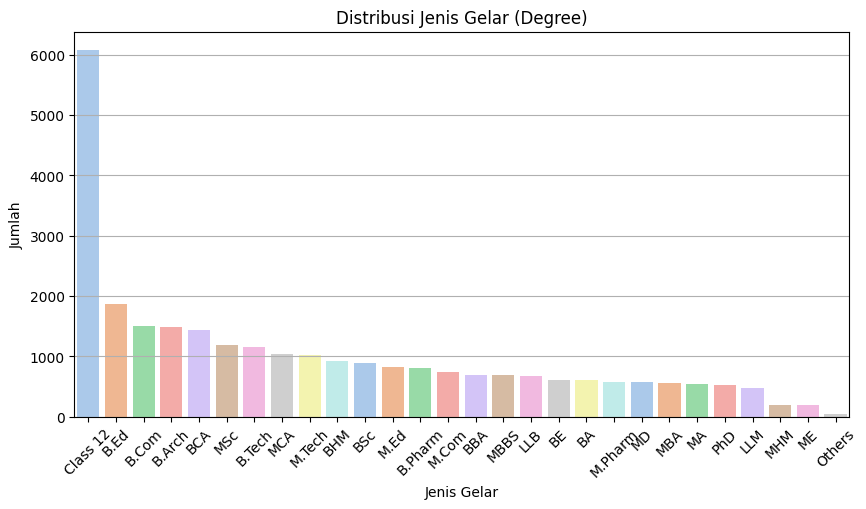

In [24]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Degree', data=df, order=df['Degree'].value_counts().index, palette='pastel')
plt.title("Distribusi Jenis Gelar (Degree)")
plt.xlabel("Jenis Gelar")
plt.ylabel("Jumlah")
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.show()

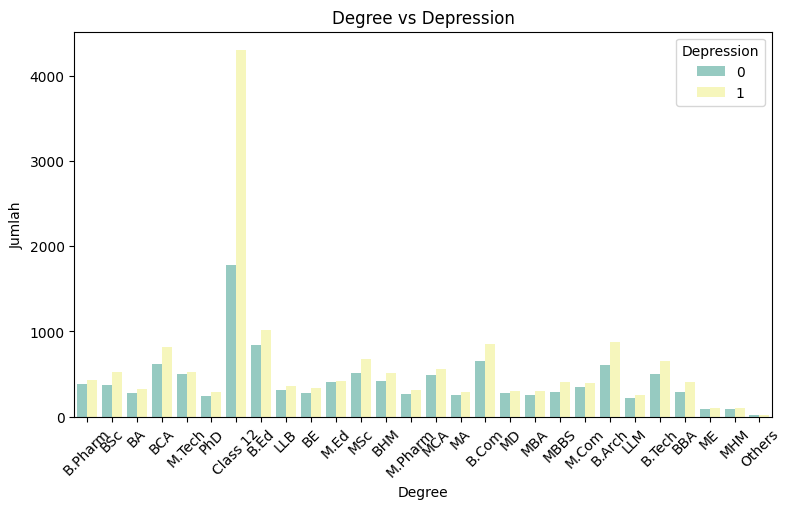

In [25]:
plt.figure(figsize=(9, 5))
sns.countplot(x='Degree', hue='Depression', data=df, palette='Set3')
plt.title("Degree vs Depression")
plt.xlabel("Degree")
plt.ylabel("Jumlah")
plt.xticks(rotation=45)
plt.show()


dari diagram di atas, bahwa data ini didominasi oleh siswa kelas 12. dan perbandingan nya juga cukup jauh dengan yang lainnya.

### Pemikiran Bunuh Diri dan Depresi

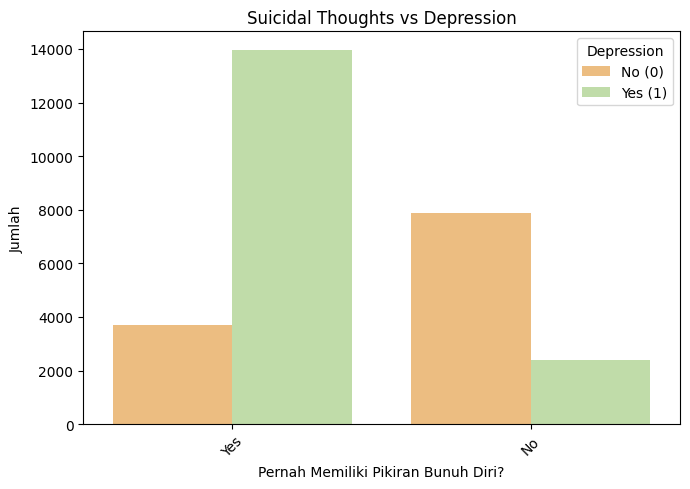

In [26]:
plt.figure(figsize=(7, 5))
sns.countplot(
    x='Have you ever had suicidal thoughts ?',
    hue='Depression',
    data=df,
    palette='Spectral'
)
plt.title("Suicidal Thoughts vs Depression")
plt.xlabel("Pernah Memiliki Pikiran Bunuh Diri?")
plt.ylabel("Jumlah")
plt.xticks(rotation=45)
plt.legend(title='Depression', labels=['No (0)', 'Yes (1)'])
plt.tight_layout()
plt.show()

Terdapat hubungan yang kuat antara pikiran bunuh diri dan tingkat depresi. Individu yang pernah memiliki pikiran bunuh diri memiliki risiko depresi yang lebih tinggi. Ini menunjukkan pentingnya perhatian terhadap kesehatan mental dan intervensi yang diperlukan untuk individu yang mengalami pikiran bunuh diri.

### Korelasi Antar Fitur Numerik

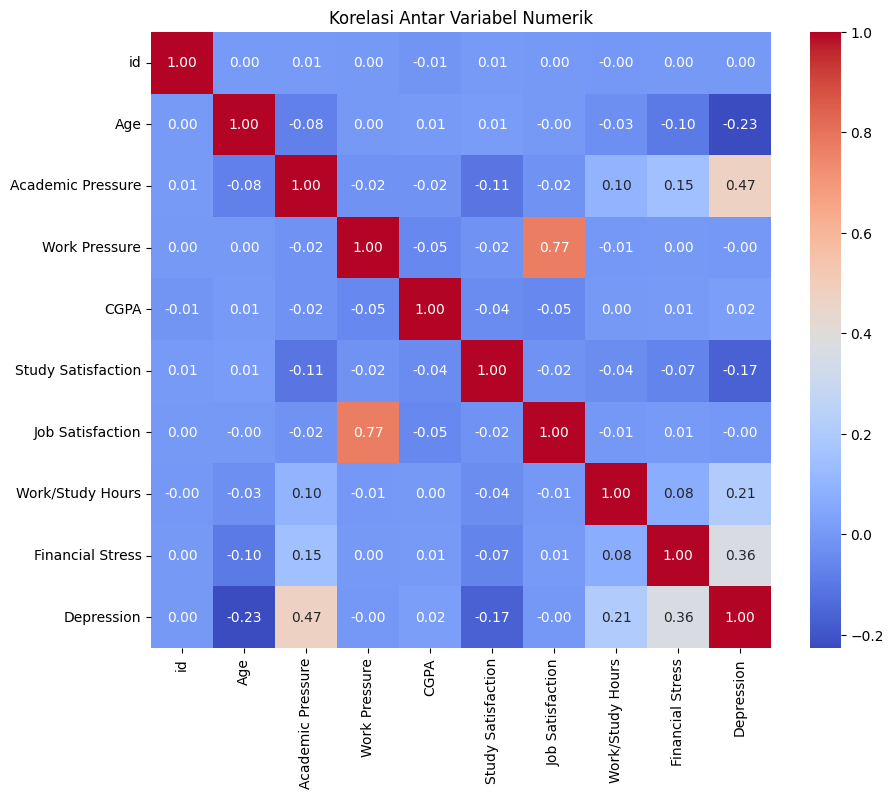

In [27]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi Antar Variabel Numerik')
plt.show()

dari heatmap di atas dapat dilihat bahwa id, work pressure, dan job satisfaction memiliki angka 0 yang menunjukkan hubungan yang lemah. kemudian diikuti dengan CGPA dengan 0.02.

## Data Preparation

### Cek Mising Values & Duplicate

In [28]:
print(df.isnull().sum())

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64


terdapat 3 missing values dari financial stress. hal ini akan diisi dengan median dari data tersebut.

In [29]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
df['Financial Stress'] = imputer.fit_transform(df[['Financial Stress']])

In [30]:
print("Jumlah data duplikat:", df.duplicated().sum())

Jumlah data duplikat: 0


tidak ada duplikasi, data sudah cukup bersih.

### Drop Kolom Tidak Relevan

Karena Bisnis Understanding nya akan mengarah ke student kita membatasi bahwa yang akan diambil adalah semua individu yang berprofesi sebagai student.

In [31]:
df_students = df[df['Profession'] == 'Student']


Kolom berikut dihapus karena tidak memberikan informasi bermakna dalam analisis dan pemodelan:

- id: hanya identitas unik, tidak berkontribusi pada prediksi.

- City: terlalu spesifik dan bisa menambah dimensi data tanpa manfaat signifikan.

- Degree: dinilai tidak memberikan korelasi kuat terhadap variabel target (Depression) dan dapat menimbulkan multikolinearitas jika dikodekan.

In [32]:
df_students.drop(columns=['id', 'City', 'Profession', 'Degree'], inplace=True)


<ipython-input-32-c54207a61b13>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_students.drop(columns=['id', 'City', 'Profession', 'Degree'], inplace=True)


### Encoding

ordinal encoding

In [33]:
sleep_duration_mapping = {
    'Less than 5 hours': 0,
    '5-6 hours': 1,
    '7-8 hours': 2,
    'More than 8 hours': 3,
    'Others': 2 # diasumsikan ideal jam tidur
}

dietary_habits_mapping = {
    'Unhealthy': 0,
    'Moderate': 1,
    'Healthy': 2,
    'Others': 1 # diasumsikan sedang
}

df_students['Sleep Duration'] = df['Sleep Duration'].map(sleep_duration_mapping)
df_students['Dietary Habits'] = df['Dietary Habits'].map(dietary_habits_mapping)

<ipython-input-33-6ff7997396ef>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_students['Sleep Duration'] = df['Sleep Duration'].map(sleep_duration_mapping)
<ipython-input-33-6ff7997396ef>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_students['Dietary Habits'] = df['Dietary Habits'].map(dietary_habits_mapping)


Binary encoding

In [34]:
gender_mapping = {
    'Male': 0,
    'Female': 1
}

binary_mapping = {
    'No': 0,
    'Yes': 1
}

df_students['Gender'] = df['Gender'].map(gender_mapping)
df_students['Have you ever had suicidal thoughts ?'] = df['Have you ever had suicidal thoughts ?'].map(binary_mapping)
df_students['Family History of Mental Illness'] = df['Family History of Mental Illness'].map(binary_mapping)


<ipython-input-34-fbb5ce63733e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_students['Gender'] = df['Gender'].map(gender_mapping)
<ipython-input-34-fbb5ce63733e>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_students['Have you ever had suicidal thoughts ?'] = df['Have you ever had suicidal thoughts ?'].map(binary_mapping)
<ipython-input-34-fbb5ce63733e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [35]:
df_students.head()

,Gender,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,33.0,5.0,0.0,8.97,2.0,0.0,1,2,1,3.0,1.0,0,1
1,1,24.0,2.0,0.0,5.90,5.0,0.0,1,1,0,3.0,2.0,1,0
2,0,31.0,3.0,0.0,7.03,5.0,0.0,0,2,0,9.0,1.0,1,0
3,1,28.0,3.0,0.0,5.59,2.0,0.0,2,1,1,4.0,5.0,1,1
4,1,25.0,4.0,0.0,8.13,3.0,0.0,1,1,1,1.0,1.0,0,0


### split dataset

In [36]:
X = df_students.drop('Depression', axis=1)
y = df_students['Depression']

In [37]:
df_students.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27870 entries, 0 to 27900
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27870 non-null  int64  
 1   Age                                    27870 non-null  float64
 2   Academic Pressure                      27870 non-null  float64
 3   Work Pressure                          27870 non-null  float64
 4   CGPA                                   27870 non-null  float64
 5   Study Satisfaction                     27870 non-null  float64
 6   Job Satisfaction                       27870 non-null  float64
 7   Sleep Duration                         27870 non-null  int64  
 8   Dietary Habits                         27870 non-null  int64  
 9   Have you ever had suicidal thoughts ?  27870 non-null  int64  
 10  Work/Study Hours                       27870 non-null  float64
 11  Financi

In [38]:
X

,Gender,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,0,33.0,5.0,0.0,8.97,2.0,0.0,1,2,1,3.0,1.0,0
1,1,24.0,2.0,0.0,5.90,5.0,0.0,1,1,0,3.0,2.0,1
2,0,31.0,3.0,0.0,7.03,5.0,0.0,0,2,0,9.0,1.0,1
3,1,28.0,3.0,0.0,5.59,2.0,0.0,2,1,1,4.0,5.0,1
4,1,25.0,4.0,0.0,8.13,3.0,0.0,1,1,1,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,1,27.0,5.0,0.0,5.75,5.0,0.0,1,0,1,7.0,1.0,1
27897,0,27.0,2.0,0.0,9.40,3.0,0.0,0,2,0,0.0,3.0,1
27898,0,31.0,3.0,0.0,6.61,4.0,0.0,1,0,0,12.0,2.0,0
27899,1,18.0,5.0,0.0,6.88,2.0,0.0,0,2,1,10.0,5.0,0


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modeling & Evaluation

In [40]:
models = {
    'Logistic Regression': LogisticRegression(solver='liblinear', random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='rbf', probability=True, random_state=42)
}

In [41]:
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None

    results[name] = {
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    }
    print(f"Model: {name}")
    print(classification_report(y_test, y_pred))
    print('-'*40)

Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.84      0.78      0.81      2347
           1       0.85      0.89      0.87      3227

    accuracy                           0.85      5574
   macro avg       0.85      0.84      0.84      5574
weighted avg       0.85      0.85      0.85      5574

----------------------------------------
Model: Random Forest
              precision    recall  f1-score   support

           0       0.83      0.79      0.81      2347
           1       0.85      0.88      0.87      3227

    accuracy                           0.84      5574
   macro avg       0.84      0.83      0.84      5574
weighted avg       0.84      0.84      0.84      5574

----------------------------------------
Model: SVM
              precision    recall  f1-score   support

           0       0.84      0.78      0.81      2347
           1       0.85      0.89      0.87      3227

    accuracy                           0.

In [42]:
results_df = pd.DataFrame(results).T
print(results_df)

                     Accuracy  Precision    Recall  F1 Score   ROC AUC
Logistic Regression  0.846250   0.849970  0.891850  0.870407  0.921945
Random Forest        0.841227   0.851019  0.879764  0.865153  0.914817
SVM                  0.846789   0.848868  0.894639  0.871153  0.921959


Visualisasi Matrik

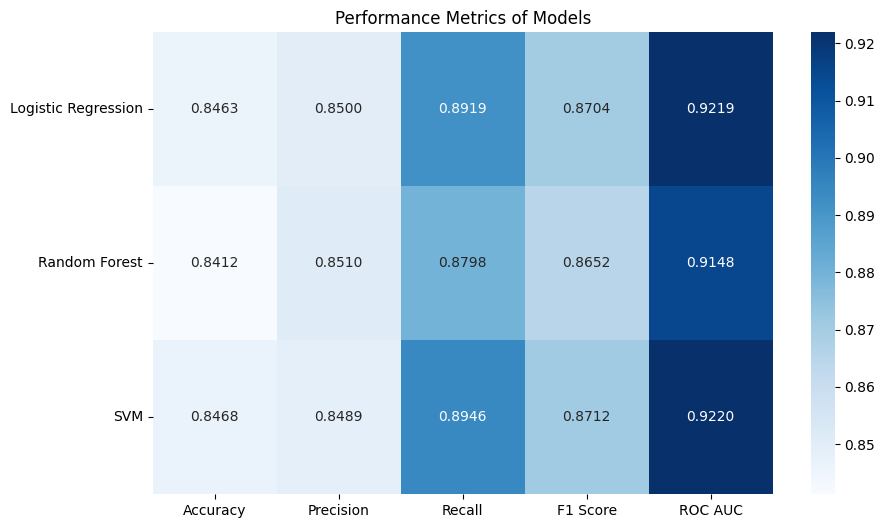

In [43]:
results_df = pd.DataFrame(results).T

plt.figure(figsize=(10, 6))
sns.heatmap(results_df, annot=True, fmt=".4f", cmap="Blues")
plt.title("Performance Metrics of Models")
plt.yticks(rotation=0)
plt.show()

Berdasarkan perbandingan ketiga model, dapat dilihat bahwan SVM memiliki performa terbaik dan Random Forest memiliki performa paling rendah. Meskipun antara 3 model tersebut tidak memiliki perbedaan yang cukup signifikan.

**feature selection + SVM**

In [46]:
pipeline = Pipeline([
    ('feature_selection', SelectKBest(score_func=f_classif)),
    ('svm', SVC(probability=True, random_state=42))
])

Hyperparameter grid

In [44]:
param_grid = {
    'feature_selection__k': [5, 10, 'all'],
    'svm__C': [0.1, 1, 10],
    'svm__gamma': ['scale', 'auto', 0.01, 0.001],
    'svm__kernel': ['rbf']
}

Grid search

In [47]:
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='f1',
    verbose=1,
    n_jobs=-1
)

In [48]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('feature_selection', SelectKBest()),
                                       ('svm',
                                        SVC(probability=True,
                                            random_state=42))]),
             n_jobs=-1,
             param_grid={'feature_selection__k': [5, 10, 'all'],
                         'svm__C': [0.1, 1, 10],
                         'svm__gamma': ['scale', 'auto', 0.01, 0.001],
                         'svm__kernel': ['rbf']},
             scoring='f1', verbose=1)

In [49]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

Evaluation

In [50]:
print("Best Parameters:", grid_search.best_params_)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Best Parameters: {'feature_selection__k': 10, 'svm__C': 1, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.78      0.81      2347
           1       0.85      0.89      0.87      3227

    accuracy                           0.85      5574
   macro avg       0.85      0.84      0.84      5574
weighted avg       0.85      0.85      0.85      5574



In [52]:
results['SVM Tuned'] = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1 Score': f1_score(y_test, y_pred),
    'ROC AUC': roc_auc_score(y_test, y_proba)
}

ambil fitur terbaik

In [53]:
feature_names = X_train.columns if hasattr(X_train, 'columns') else [f'Feature {i}' for i in range(X_train.shape[1])]

selector = best_model.named_steps['feature_selection']
mask = selector.get_support()

selected_features = np.array(feature_names)[mask]
print("Fitur yang dipilih oleh SelectKBest:")
for feat in selected_features:
    print(f"- {feat}")

Fitur yang dipilih oleh SelectKBest:
- Age
- Academic Pressure
- CGPA
- Study Satisfaction
- Sleep Duration
- Dietary Habits
- Have you ever had suicidal thoughts ?
- Work/Study Hours
- Financial Stress
- Family History of Mental Illness


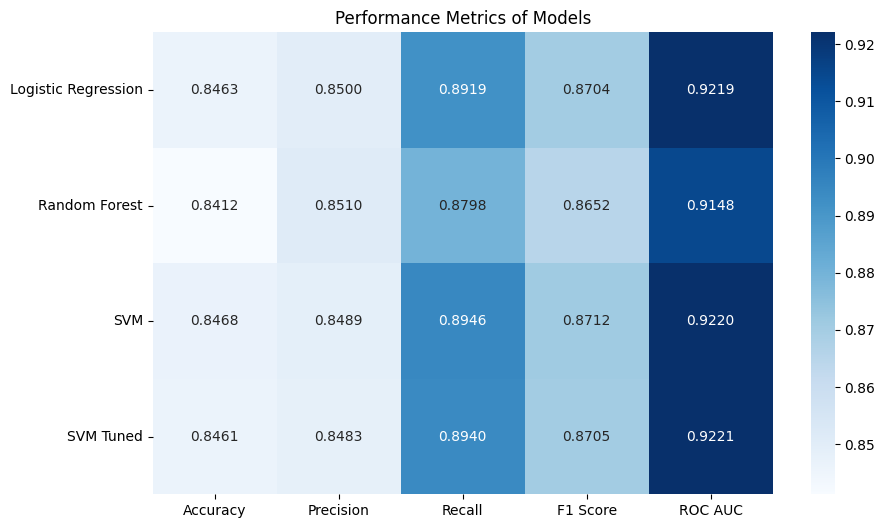

In [55]:
results_df = pd.DataFrame(results).T

plt.figure(figsize=(10, 6))
sns.heatmap(results_df, annot=True, fmt=".4f", cmap="Blues")
plt.title("Performance Metrics of Models")
plt.yticks(rotation=0)
plt.show()